# Multiple Linear Regression in Statsmodels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives
You will be able to:
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Use standardization/normalization on features of a dataset
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Use statsmodels to fit a multiple linear regression model
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters


## The Ames Housing Data

Using the specified continuous and categorical features, preprocess your data to prepare for modeling:
* Split off and one hot encode the categorical features of interest
* Log and scale the selected continuous features

In [1]:
import pandas as pd
import numpy as np

ames = pd.read_csv('ames.csv')

continuous = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']


## Continuous Features

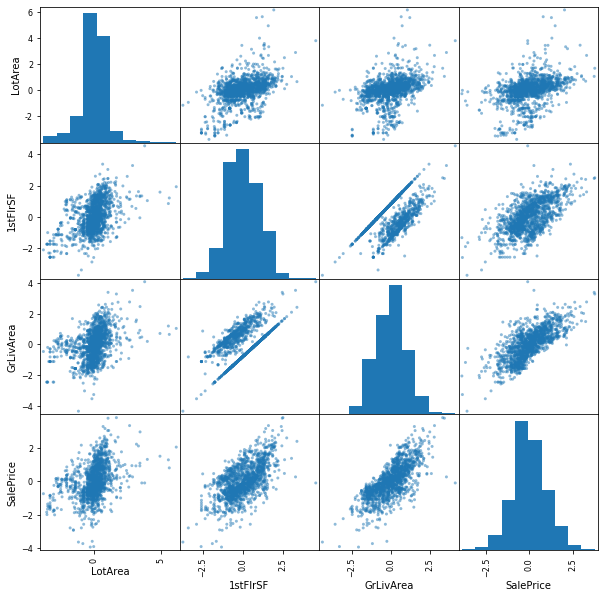

In [3]:
# Log transform and normalize
import numpy as np
import matplotlib.pyplot as plt

cont = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']]
for column in cont.columns: 
    cont[column] = cont[column].map(lambda x: np.log(x))

def standardize(feature):
    return (feature - np.mean(feature)) / np.std(feature)

cont = cont.apply(standardize)

pd.plotting.scatter_matrix(cont, figsize=(10, 10))
plt.show()

## Categorical Features

In [8]:
# One hot encode categoricals
hot = pd.DataFrame()

for category in categoricals:
    dum = pd.get_dummies(ames[category], prefix=category)
    hot = pd.concat([hot, dum], axis=1)

hot.head()

,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleType_COD,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


## Combine Categorical and Continuous Features

In [9]:
# combine features into a single dataframe called preprocessed
preprocessed = pd.concat([cont, hot], axis=1)
preprocessed.head()

,LotArea,1stFlrSF,GrLivArea,SalePrice,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,KitchenQual_Ex,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,-0.133231,-0.803570,0.529260,0.560068,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.113442,0.418585,-0.381846,0.212764,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.420061,-0.576560,0.659675,0.734046,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.103347,-0.439287,0.541511,-0.437382,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.878409,0.112267,1.282191,1.014651,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Run a linear model with SalePrice as the target variable in statsmodels

In [14]:
# Your code here
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm

ind = preprocessed.drop('SalePrice', axis=1)
y = preprocessed['SalePrice']
X_int = sm.add_constant(ind)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     156.5
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        09:13:42   Log-Likelihood:                -738.64
No. Observations:                1460   AIC:                             1573.
Df Residuals:                    1412   BIC:                             1827.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0599      0.048     -1.257      0.209      -0.153       0.034
LotArea                  0.1033      0.019      5.475      0.000       0.066       0.140
1stFlrSF                 0.1371      0.016      8.584      0.000       0.106       0.168
GrLivArea                0.3768      0.016     24.114      0.000       0.346       0.407
BldgType_1Fam            0.1447      0.034      4.244      0.000       0.078       0.212
BldgType_2fmCon         -0.0268      0.072     -0.373      0.709      -0.167       0.114
BldgType_Duplex         -0.2757      0.056     -4.894      0.000      -0.386      -0.165
BldgType_Twnhs           0.0044      0.074      0.059      0.953      -0.140       0.149
BldgType_TwnhsE          0.0935      0.048      1.964      0.050       0.000       0.187
KitchenQual_Ex           0.4980      0.045     11.113      0.000       0.410       0.586
KitchenQual_Fa          -0.5022      0.057     -8.785      0.000      -0.614      -0.390
KitchenQual_Gd           0.1158      0.028      4.168      0.000       0.061       0.170
KitchenQual_TA          -0.1715      0.027     -6.384      0.000      -0.224      -0.119
SaleType_COD            -0.2035      0.080     -2.531      0.011      -0.361      -0.046
SaleType_CWD             0.0250      0.191      0.131      0.896      -0.350       0.400
SaleType_Con             0.3827      0.270      1.420      0.156      -0.146       0.911
SaleType_ConLD           0.1117      0.138      0.811      0.418      -0.159       0.382
SaleType_ConLI          -0.1704      0.173     -0.986      0.324      -0.510       0.169
SaleType_ConLw          -0.1874      0.173     -1.081      0.280      -0.528       0.153
SaleType_New             0.0964      0.068      1.418      0.156      -0.037       0.230
SaleType_Oth            -0.0857      0.218     -0.392      0.695      -0.514       0.343
SaleType_WD             -0.0287      0.057     -0.500      0.617      -0.141       0.084
MSZoning_C (all)        -0.8206      0.130     -6.302      0.000      -1.076      -0.565
MSZoning_FV              0.2464      0.096      2.565      0.010       0.058       0.435
MSZoning_RH              0.0565      0.098      0.576      0.565      -0.136       0.249
MSZoning_RL              0.1758      0.049      3.617      0.000       0.080       0.271
MSZoning_RM              0.2820      0.054      5.192      0.000       0.175       0.389
Street_Grvl              0.0767      0.109      0.705      0.481      -0.137       0.290
Street_Pave             -0.1365      0.075     -1.825      0.068      -0.283       0.010
Neighborhood_Blmngtn     0.2329      0.111      2.095      0.036       0.015       0.451
Neighborhood_Blueste     0.2859      0.287      0.998      0.319      -0.276       0.848
Neighborhood_BrDale     -0.2300      0.122     -1.883    

## Run the same model in scikit-learn

In [15]:
# Your code here - Check that the coefficients and intercept are the same as those from Statsmodels

from sklearn.linear_model import LinearRegression

y = preprocessed['SalePrice']
linreg = LinearRegression()
linreg.fit(predictors, y)

linreg.coef_, linreg.intercept_

(array([ 1.03282619e-01,  1.37137245e-01,  3.76822514e-01, -3.04122986e+10,
        -3.04122986e+10, -3.04122986e+10, -3.04122986e+10, -3.04122986e+10,
         2.62907578e+09,  2.62907578e+09,  2.62907578e+09,  2.62907578e+09,
        -1.76811403e+09, -1.76811403e+09, -1.76811403e+09, -1.76811403e+09,
        -1.76811403e+09, -1.76811403e+09, -1.76811403e+09, -1.76811403e+09,
        -1.76811403e+09,  1.04098033e+10,  1.04098033e+10,  1.04098033e+10,
         1.04098033e+10,  1.04098033e+10,  1.07022959e+09,  1.07022959e+09,
         8.63047836e+08,  8.63047836e+08,  8.63047836e+08,  8.63047836e+08,
         8.63047836e+08,  8.63047836e+08,  8.63047836e+08,  8.63047836e+08,
         8.63047836e+08,  8.63047835e+08,  8.63047836e+08,  8.63047836e+08,
         8.63047836e+08,  8.63047836e+08,  8.63047836e+08,  8.63047837e+08,
         8.63047837e+08,  8.63047835e+08,  8.63047836e+08,  8.63047836e+08,
         8.63047836e+08,  8.63047836e+08,  8.63047837e+08,  8.63047836e+08,
         8.6

## Predict the house price given the following characteristics (before manipulation!!)

Make sure to transform your variables as needed!

- LotArea: 14977
- 1stFlrSF: 1976
- GrLivArea: 1976
- BldgType: 1Fam
- KitchenQual: Gd
- SaleType: New
- MSZoning: RL
- Street: Pave
- Neighborhood: NridgHt

## Summary
Congratulations! You pre-processed the Ames Housing data using scaling and standardization. You also fitted your first multiple linear regression model on the Ames Housing data using statsmodels and scikit-learn!